# PREDICTION DU PRIX DE L'OR, MODE UNIVARIE (Adj Close et date)

Tache effectuées :
   * a) Identification de la target
   * b) Nombre des lignes et de colones
   * c) Identification des valeurs manquantes
   * d) Types de variables
   * e) Visualisation de la cible
   * f) Comprehension des differentes variables
   * g) Visualisation des relations: features/target
   * h) Identification des outliers

### CHARGEMENT DES BIBLIOTHEQUES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing


### CHARGEMENT DU DATASET

In [4]:
# Importation et indexation temporelle

dataframe = pd.read_csv("FINAL_USO.csv", index_col = "Date", parse_dates = True)
dataframe = dataframe[["Adj Close"]]
dataframe

,Adj Close
Date,
2011-12-15,152.330002
2011-12-16,155.229996
2011-12-19,154.869995
2011-12-20,156.979996
2011-12-21,157.160004
...,...
2018-12-24,120.019997
2018-12-26,119.660004
2018-12-27,120.570000


In [5]:
# Nombre de lignes et de colones

dataframe.shape

(1718, 1)

In [6]:
# verification des valeurs manquantes dans tout le dataset

dataframe.isna().sum().any()

False

In [7]:
# Affiche la liste des colones contenant des valeurs manquantes

dataframe.columns[dataframe.isna().any()]

Index([], dtype='object')

In [8]:
# verification des valeurs nulles dans tout le dataset

dataframe.isnull().sum().any()

False

In [9]:
# types des variables

dataframe.dtypes

Adj Close    float64
dtype: object

In [10]:
# informations sur les données
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1718 non-null   float64
dtypes: float64(1)
memory usage: 26.8 KB
None


### Visualisation de la variable cible

In [11]:
dataframe.head()

,Adj Close
Date,
2011-12-15,152.330002
2011-12-16,155.229996
2011-12-19,154.869995
2011-12-20,156.979996
2011-12-21,157.160004


<AxesSubplot:xlabel='Date'>

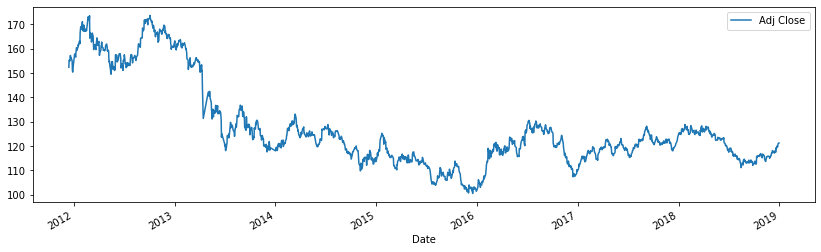

In [12]:
dataframe.plot(y="Adj Close", figsize=(14,4))

### Prévoir  à l’aide des méthodes de lissage exponentiel

C:\Users\iatrade\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


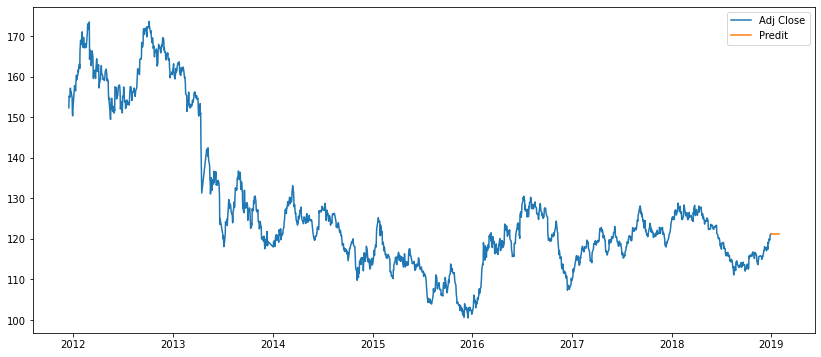

In [32]:
les = ExponentialSmoothing(np.asarray(dataframe['Adj Close']), trend=None, seasonal=None).fit()
les_pred = les.forecast(30)

plt.figure(figsize=(14,6))
plt.plot(dataframe['Adj Close'], label='Adj Close')
plt.plot(pd.date_range(dataframe.index[len(dataframe)-1], periods=30, freq='D'), les_pred, label='Predit')
plt.legend()
plt.show()

### avec le lissage exponentiel double

C:\Users\iatrade\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


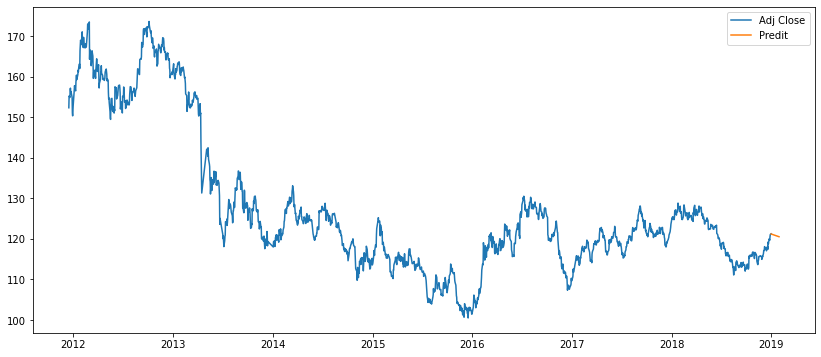

In [33]:
led = ExponentialSmoothing(np.asarray(dataframe['Adj Close']), trend='mul', seasonal=None).fit()
led_pred = led.forecast(30)

plt.figure(figsize=(14,6))
plt.plot(dataframe['Adj Close'], label='Adj Close')
plt.plot(pd.date_range(dataframe.index[len(dataframe)-1], periods=30, freq='D'), led_pred, label='Predit')
plt.legend()
plt.show()

### la méthode de Holt-Winters

C:\Users\iatrade\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


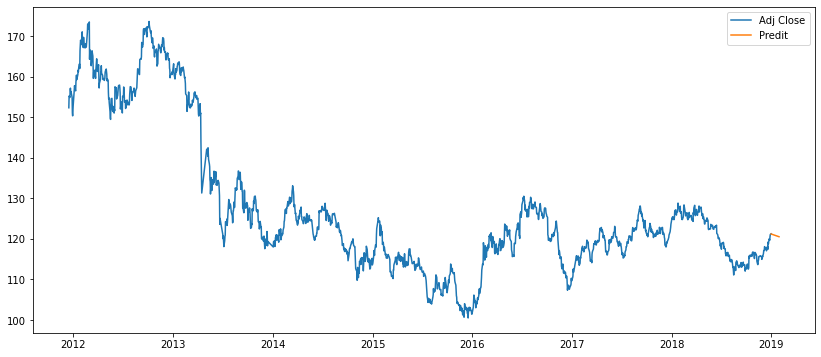

In [34]:
hw = ExponentialSmoothing(np.asarray(dataframe['Adj Close']), trend='mul', seasonal=None).fit()
hw_pred = hw.forecast(30)

plt.figure(figsize=(14,6))
plt.plot(dataframe['Adj Close'], label='Adj Close')
plt.plot(pd.date_range(dataframe.index[len(dataframe)-1], periods=30, freq='D'), hw_pred, label='Predit')
plt.legend()
plt.show()